___
# Análise Exploratória: Variáveis quantitativas
___

## Aula 04



**Preparo prévio:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): pág. 18 a 25; pág. 106 e 107 (Definição 4.1 e Exemplo 4.1); pág. 116 e 117 (Definição 4.4 e Exemplo 4.8). 
2. Leitura prévia necessária: Montgomery et al (5ª. Edição): pág. 24 a 28.

**Hoje:**
1. Desenvolver medidas que gerem informações para interpretação de variáveis quantitativas.
2. Interpretar o comportamento de uma variável quantitativa a partir dos formatos de um histograma e/ou um box-plot.
3. Comparar cenários, a partir dos gráficos e medidas calculadas, para tomada de decisão.


**Próxima aula:**
1. Leitura prévia necessária: Montgomery et al (5ª. Edição) - Seção 2.6: Dados Multivariados.
___


## <font color='blue'>Expectativa de Vida - LIFE</font>

O Banco Mundial (http://data.worldbank.org/brazilian-portuguese) disponibiliza bases de dados estatísticos para um pouco mais de 200 países do mundo desde o ano 1800, as quais consideram uma seleção abrangente de indicadores econômicos, sociais e ambientais. Um desses indicadores é a expectativa de vida (em anos) de cada país.

O arquivo `Life.xlsx` contém a expectativa de vida de vários países para os anos 1800, 1926 e 2000.

Considerando esses dados, faça as seguintes tarefas:

1.	Calcule as medidas resumo principais (de posição e de dispersão). 

2.	Calcule os percentis 10% a 90% das expectativas de vida de cada ano.

3. Construa o gráfico de boxplot  para cada ano e interprete-o. 


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/gabiuas


In [3]:
dados = pd.read_excel('Life.xlsx')

___
# Medidas de posição e dispersão

In [4]:
#Via descrive()
dados.describe()

,L1800,L1926,L2000
count,201.000000,201.000000,201.000000
mean,31.485800,36.353496,68.012856
std,3.763625,9.590987,9.211812
min,23.387000,23.387000,45.700000
25%,29.000000,30.400000,61.400000
50%,31.800000,32.800000,71.200000
75%,33.900000,39.360000,75.000000
max,42.845599,63.260000,81.100000


In [7]:
#Medidas-resumo via comandos

col = ['L1800','L1926','L2000']
idx = ['mean','median','std','mad','var','count']
df = pd.DataFrame(index=idx)

for i in range(0, 3):
    df[col[i]] = pd.Series([ dados[col[i]].mean(), 
                             dados[col[i]].median(), 
                             dados[col[i]].std(),
                             dados[col[i]].mad(), 
                             dados[col[i]].var(), 
                             len(dados[col[i]]) 
                           ], index=idx)
    
print(df)

             L1800       L1926       L2000
mean     31.485800   36.353496   68.012856
median   31.800000   32.800000   71.200000
std       3.763625    9.590987    9.211812
mad       2.987978    7.400514    7.788425
var      14.164874   91.987027   84.857487
count   201.000000  201.000000  201.000000


___
# Percentis de ordem p -

### Valor que divide p% dos menores valores dos (1-p)% maiores valores!!

In [8]:
#Quantis  
print(dados.quantile(np.arange(0,1.10,.10)))

         L1800     L1926   L2000
0.0  23.387000  23.38700  45.700
0.1  25.986000  26.98000  52.600
0.2  28.700000  29.80000  59.500
0.3  29.700000  30.90000  63.600
0.4  30.700000  31.99072  68.500
0.5  31.800000  32.80000  71.200
0.6  32.300000  34.90500  72.900
0.7  33.100000  38.40000  74.300
0.8  34.753000  40.93020  76.077
0.9  36.200000  53.30608  78.100
1.0  42.845599  63.26000  81.100


___

## Boxplot para os anos 1800, 1926 e 2000

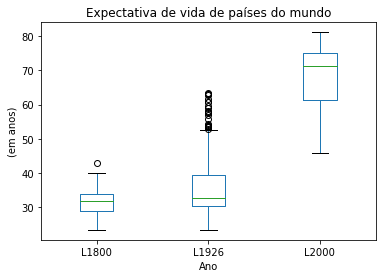

In [9]:
# Boxplot
plot = dados.plot(kind='box',title='Expectativa de vida de países do mundo')#, color='red')
plt.ylabel('(em anos)')
plt.xlabel('Ano')

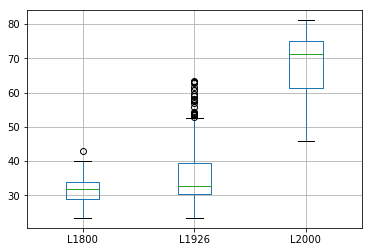

In [10]:
# Boxplot do Pandas!

plot = dados.boxplot(column=list(dados)[1:])